# Advanced matplotlib (or Problems I faced with matplotlib)

**Alejandro Sazo Gómez**<br />
Ingeniero Civil Informático, UTFSM.<br />
Estudiante Magíster en Cs. Ing. Informática, UTFSM

## Distributions over time

Let's suppose you have a dynamical system modeling a phenomena and we perform an iterative numerical simulation until we reach a steady state. At each step of the iteration, let's say, a step (or time) $t$, we can get the distribution plot of a certain data.

In this case I worked with **grain growth** simulations...  What is grain growth? OK, briefly we got a system of microscopical grains in ceramic and metals and under certain conditions of temperature and presure the grains grows at expense of other grains, which shrinks and even dissapear.

<img src=images/fig4.gif></img>
*Source: http://www.tms.org/pubs/journals/JOM/0109/Holm-0109.html*

**The distribution of grain areas defines some material properties (conductivity, resistance...).**
So, at each step of the numerical simulation, we can get the (relative) distribution of grain areas. We should find by theoretical results and by experimental data with some real materials that a steady state in distribution is reached independently of the number of grains...

Let's take a look on how a distribution plot should look

### 1) Save and load data

The data of each simulation step has been saved using [pickle package](https://docs.python.org/2/library/pickle.html). This package helps to serialize and deserialize objects (convert our object to a byte stream and vice versa).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
# This is my custom object which holds the structure for my grains
from GrainStructure import Grain_Structure

In order to save our structure we call the funcion ```pickle.dump()``` which receives as arguments the object that we want to save, the output file and a protocol to serialize. For example,

In [4]:
# Example path and object, path must be created!
path = "grains_data/test/all.pkl"
GS = Grain_Structure()
# Save object to a file
with open(path, 'wb') as output:
    pickle.dump(GS, output)

In order to recover the saved object we can use the function ```pickle.load()``` which receives as arguments a file object. This file must be open!. The return of this function is the desired object.

In [5]:
# The class of the stored object must be loaded before!
GS = pickle.load(open("grains_data/10/all.pkl", "rb"))

### 2) Building histograms from loaded data

Now that we have our data we can make some histograms...

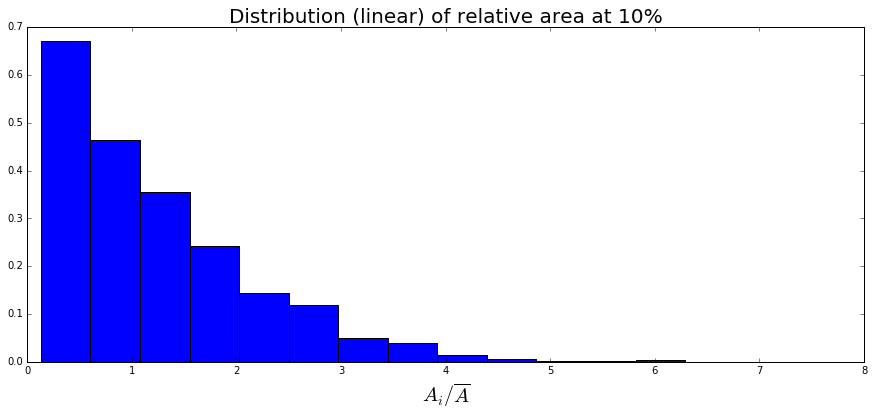

In [6]:
%matplotlib inline

# This is the data of the histogram recovered from pickle object
areas = GS.areas[GS.grains_ids]
relareas = len(areas) * areas

# Let's plot
plt.figure(figsize=(15,6))
fs = 20
bins = np.linspace(-2, 7, 20)
plt.title(r"Distribution (linear) of relative area at 10%", fontsize=fs)

# Here is the histogram. We wanted a distribution, so normed help us to check
# the integral of the distribution be 1
plt.hist(relareas, bins, align='right', normed=True)
# A nice latex label, if it's written in latex, then it must be true...
plt.xlabel(r"$A_i / \overline{A}$", fontsize=fs)
plt.xlim([0, 8])
plt.show()

This distribution corresponds to a numerical simulation after 10% of grains were removed. The histogram has been normed so we can take is as a distribution. A plot of what happens in an advanced state (40% of grains removed) is shown here:

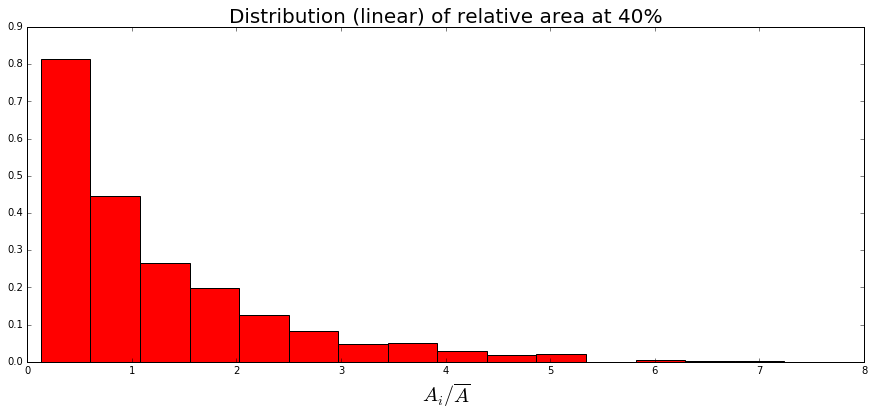

In [7]:
%matplotlib inline

GS = pickle.load(open("grains_data/40/all.pkl", "rb"))
areas = GS.areas[GS.grains_ids]
relareas = len(areas) * areas
plt.figure(figsize=(15,6))
plt.title(r"Distribution (linear) of relative area at 40%", fontsize=fs)
plt.hist(relareas, bins, align='right', normed=True, color='r')
plt.xlabel(r"$A_i / \overline{A}$", fontsize=fs)
plt.xlim([0, 8])
plt.show()

### 3) 3D plots for histograms

How is the distribution of areas along the simulation? We could plot the histograms over time as a 3D plot.
A lot of data has been generated and we can load it as shown above.

<IPython.core.display.Javascript object>


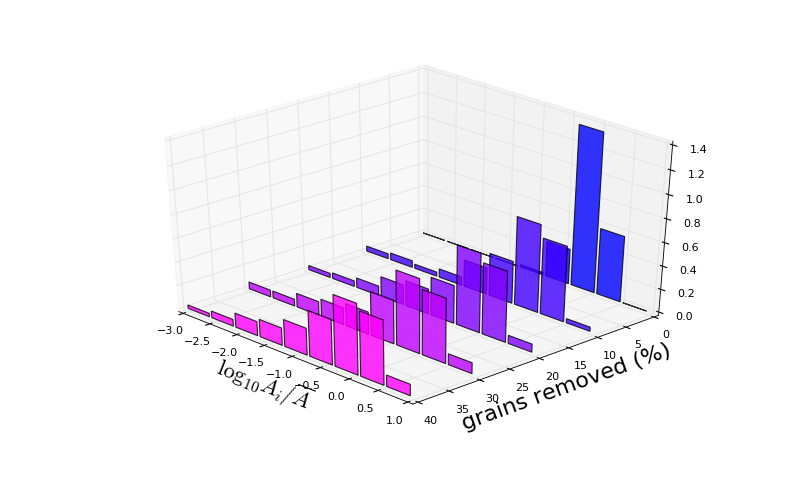

(-3, 1.0)

In [9]:
# Simple package for 3D plotting, not the fastest but lightweight
# http://matplotlib.org/1.4.3/mpl_toolkits/mplot3d/api.html#axes3d
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure
fig = plt.figure(figsize=(10,6))
# Add a 3D subplot in figure, in general its methods are the same as a plt.*
ax = fig.add_subplot(111,projection='3d')
# Our bins for plot log(distribution)
binslog = np.linspace(-3, 1, 10)
# The data files are labeled from 10 to 40
percentages = np.arange(0, 50, 10)
# For each file
for i in percentages:
    # Load data
    GS = pickle.load(open("grains_data/"+str(i)+"/all.pkl", "rb"))
    areas = GS.areas[GS.grains_ids]
    relareas = np.log10(len(areas) * areas) # or areas.shape[0] * areas
    # Generate an histogram data with numpy instead of directly plot
    # n is actually the histogram, we use the bins to plot "manually" the bars
    n, bins_edges = np.histogram(relareas, binslog, density=True)
    ax.bar(binslog[:-1], n, width=0.4, zs=i, zdir='y', color=(i/40.0, 0.0, 1.0), alpha=0.8)
# Fancy axis labels...
ax.set_xlabel(r'$\log_{10} A_i / \overline{A}$', fontsize=fs)
ax.set_ylabel(r'grains removed (%)', fontsize=fs)
# I wanted to show the history in the y axis from back to front
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim([-3, 1.0])

### 4) Animations

What if I want to record the simulation to analyze its behavior or debug logical errors in my code? Any simple plot can be seen as a frame of a video, we just need to plot it and have a writer which creates a video for us.

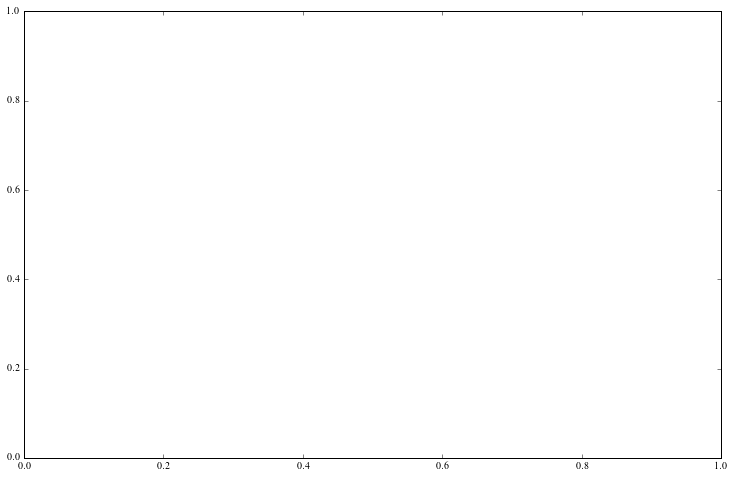

Finished


In [20]:
# The core module!
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# Some fancy settings for use with LaTeX (Remember, LaTeX = True)
plt.rc('font', **{'family': 'serif', 'serif': ['Times']})
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = [12.5, 8.]

# Declare the video writter. For simple setting I use ffmpeg, other formats are available
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Pythonclub Demo', artist='John Doe', comment='')
writer = FFMpegWriter(metadata=metadata)

# Simulation data
t = 0
dt = 0.01
MAX_TIME = 2.0
xx = np.linspace(0, 1, 100)

# The plot and video
f, (ax) = plt.subplots()
plt.show(block=False)
with writer.saving(f, "myvideo.mp4", 100):
    while t < MAX_TIME:
        ax.clear()
        ax.grid()
        yy = np.sin(xx + t)
        ax.plot(xx, yy)
        t = t + dt
        plt.draw()
        writer.grab_frame()
print "Finished"

If we want to see animations in our jupyter notebook, we must take a painful but beautiful path